## GTZAN Dataset - 샘플 음성 데이터 mel_spec 변환 및 Augmentation 적용

In [1]:
import matplotlib.pyplot as plt

import librosa
import librosa.display

import os
import glob
import numpy as np
import IPython
import random

In [2]:
audio = "./sample_data/blues.00001.wav"
data, sr = librosa.load(audio, sr=22050)   # librosa.load(오디오 파일 경로, 샘플링 주파수)

In [3]:
# STFT 계산
stft = librosa.stft(data)

mel_spec = librosa.feature.melspectrogram(S=abs(stft))

mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

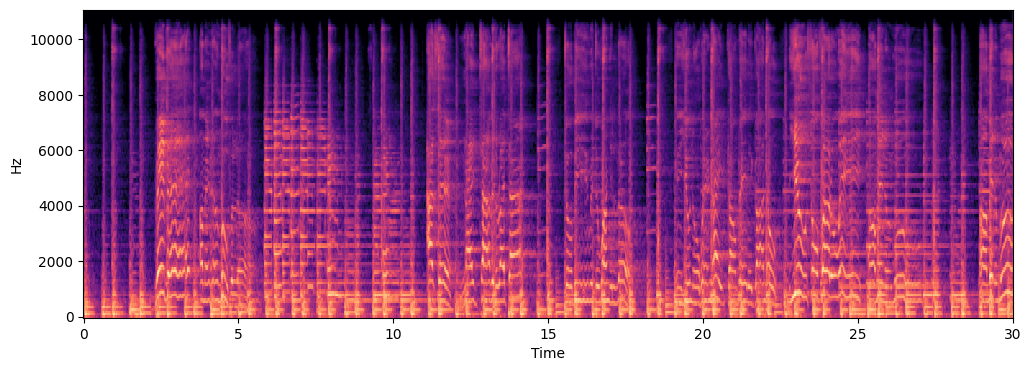

In [5]:
# 3. STFT 이미지 저장
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig(f'./sample_data/mel_spec_original.png', bbox_inches='tight', pad_inches=0)
# plt.close()

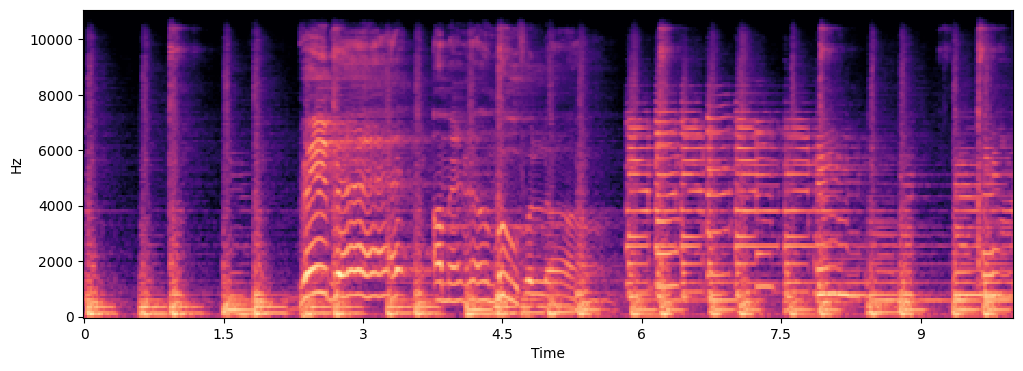

In [6]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time
data_section_stft = data[start_sample:end_sample]

# 0초~10초 구간 STFT 계산
stft_temp = librosa.stft(data_section_stft)

# mel_spec 계산
mel_spec = librosa.feature.melspectrogram(S = abs(stft_temp))

# dB 스케일로 변환
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 멜 스펙토그램 이미지 저장
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig(f'./sample_data/mel_spec_0-10.png', bbox_inches='tight', pad_inches=0)

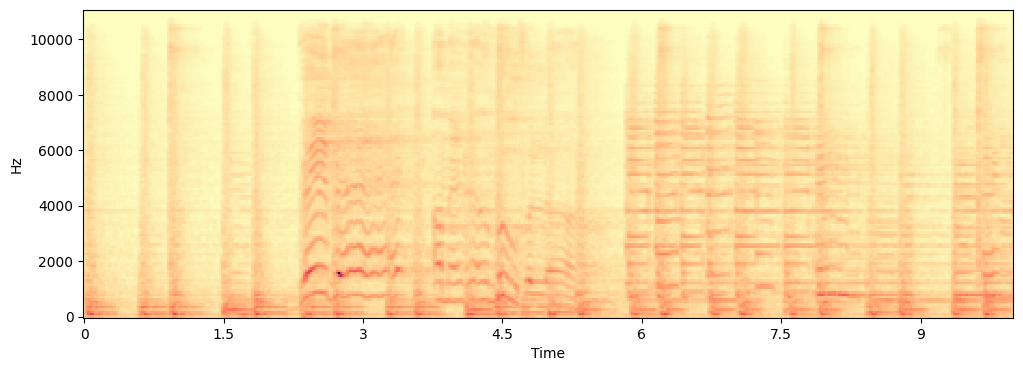

In [7]:
stft_temp_01 = librosa.stft(data_section_stft)

mel_spec_temp01 = librosa.feature.melspectrogram(S=abs(stft_temp_01))

# dB 변경
mel_spec_db_temp01 = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 노이즈 추가
noise = 0.05 * np.random.rand(*mel_spec_db.shape)
augmented_spec = mel_spec_db + noise

# dB 스케일로 변환
augmented_spec_db = librosa.amplitude_to_db(augmented_spec, ref=np.max)

# 시각화
plt.figure(figsize=(12, 4))
librosa.display.specshow(augmented_spec_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig(f'./sample_data/mel_spec_0-10_aug_noise.png', bbox_inches='tight', pad_inches=0)

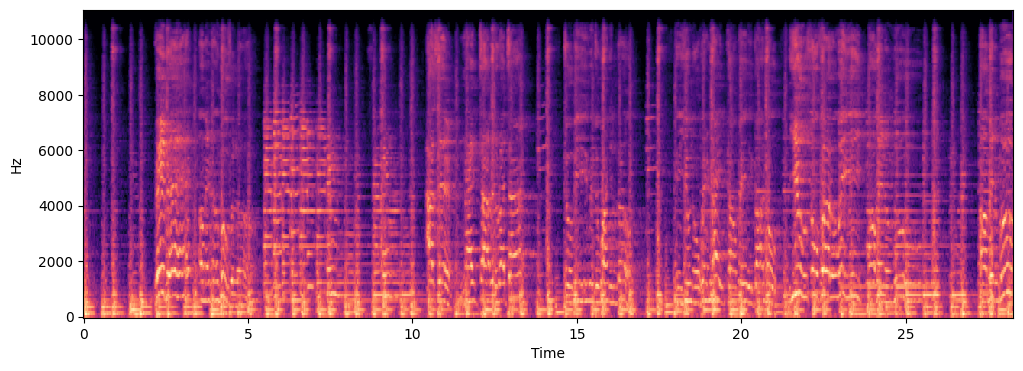

In [10]:
rate = np.random.uniform(low=0.8, high=1.2)
stretched=librosa.effects.time_stretch(data,rate=rate)

stft_stretched = librosa.stft(stretched)

mel_spec_stretched = librosa.feature.melspectrogram(S=abs(stft_stretched))


mel_spec_stretched_db = librosa.amplitude_to_db(
    mel_spec_stretched, ref=np.max
)

# 시각화
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_stretched_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig(f'./sample_data/mel_spec_0-10_aug_stretch.png', bbox_inches='tight', pad_inches=0)